# Import Library

In [2]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 7.2MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=0b93b63c07300424b2a3581114591a302663409e3a72de23241dff44ba147f14
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


Berikut adalah library yang digunakan dalam notebook ini.

In [3]:
import numpy as np                          # linear algebra
import pandas as pd                         # data processing
import skfuzzy as fuzz                      # fuzzy logic
import matplotlib.pyplot as plt             # visualization
plt.style.use('seaborn-whitegrid')          # graph settings
plt.rcParams['figure.figsize'] = (10, 5)    # graph settings

# Dataset

Kita akan mengaplikasikan fuzzy logic dalam mengelompokkan spesies bunga Iris berdasarkan ukuran kelopak dan mahkotanya. Dataset ini terdiri dari 150 observasi dan 3 kategori spesies, masing-masing spesies mempunyai 50 observasi.

<h2> Judul </h2>

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Neural Network/dataset/Data-Iris.csv')
#df = pd.read_csv('Iris.csv', index_col='Id')
df['Species'] = df['Species'].astype('category').cat.codes
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Terdapat 4 variabel yang bisa mempengaruhi kategori spesies bunga Iris. Kita dapat menggambarkan plot dari masing-masing variabel sebagai berikut.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


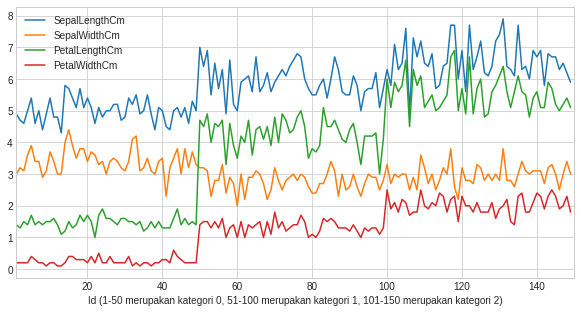

In [7]:
plt.plot(df.iloc[:, :4])
plt.legend(df.columns[:4])
plt.xlabel('Id (1-50 merupakan kategori 0, 51-100 merupakan kategori 1, 101-150 merupakan kategori 2)')
plt.xlim(1, 150)
plt.show()

# Universe Variables

Dari keempat variabel ini, kita pilih 2 yang dirasa cukup memberikan pengaruh yang signifikan dalam membedakan spesies bunga Iris:

* `PetalLengthCm`: panjang mahkota bunga
* `PetalWidthCm`: lebar mahkota bunga

Pada tabel di atas, dapat dilihat bahwa `PetalLengthCm` mempunyai nilai minimum dan maximum berturut-turut 1.0 dan 6.9. Lalu `PetalWidthCm` mempunyai nilai minimum dan maximum berturut-turut 0.1 dan 2.5. Kita akan bentuk *universe variable* 0.0-7.0 untuk `PetalLengthCm` dan 0.0-2.6 untuk `PetalWidthCm`.

In [ ]:
# Generate universe variables for input
X1_val = np.arange(0.0, 7.1, 0.5)
X2_val = np.arange(0.0, 2.7, 0.2)

Output variabel yang kita ingingkan adalah:

* `Species`: kategori spesies dari bunga Iris

Kita sudah melakukan encoding untuk mengubah kategori ini menjadi bilangan 0, 1, dan 2. Nantinya dalam melakukan pengelompokan, kita akan memberlakukan `threshold` di antara bilangan-bilangan ini. Jika prediksi dekat dengan 0, kategori yang dipilih adalah kategori A, dekat dengan 1 untuk kategori B, dan dekat dengan 2 untuk kategori C. Kita membentuk *universe variable* 0-2 untuk `Species`.

In [ ]:
# Generate universe variable for output
Y_val = np.arange(0, 3, 1)

# Membership Functions

Kita menginginkan `high`, `medium`, dan `low` *membership function* untuk kedua input dan juga output variabel. Ini dapat dilakukan sebagai berikut.

In [ ]:
# Generate fuzzy membership functions for PetalLengthCm
X1_pendek  = fuzz.trimf(X1_val, [0.0, 0.0, 3.5])
X1_sedang  = fuzz.trimf(X1_val, [0.0, 3.5, 7.0])
X1_panjang = fuzz.trimf(X1_val, [3.5, 7.0, 7.0])

# Generate fuzzy membership functions for PetalWidthCm
X2_kecil  = fuzz.trimf(X2_val, [0.0, 0.0, 1.4])
X2_sedang = fuzz.trimf(X2_val, [0.0, 1.4, 2.6])
X2_besar  = fuzz.trimf(X2_val, [1.4, 2.6, 2.6])

# Generate fuzzy membership functions for Species
Y_katA  = fuzz.trimf(Y_val, [0, 0, 1])
Y_katB  = fuzz.trimf(Y_val, [0, 1, 2])
Y_katC  = fuzz.trimf(Y_val, [1, 2, 2])

Berikut adalah visualisasi *universes* and *membership functions* yang bersangkutan.

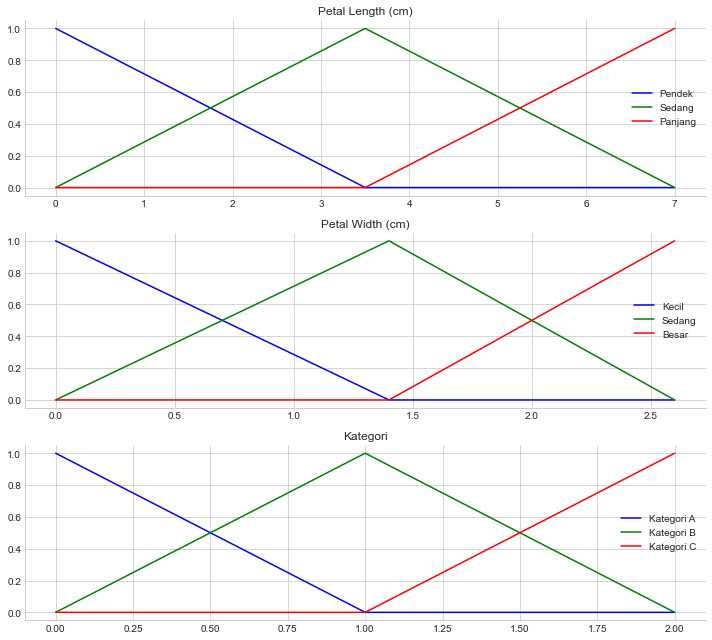

In [ ]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 9))

ax0.plot(X1_val, X1_pendek, 'b', linewidth=1.5, label='Pendek')
ax0.plot(X1_val, X1_sedang, 'g', linewidth=1.5, label='Sedang')
ax0.plot(X1_val, X1_panjang, 'r', linewidth=1.5, label='Panjang')
ax0.set_title('Petal Length (cm)')
ax0.legend()

ax1.plot(X2_val, X2_kecil, 'b', linewidth=1.5, label='Kecil')
ax1.plot(X2_val, X2_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(X2_val, X2_besar, 'r', linewidth=1.5, label='Besar')
ax1.set_title('Petal Width (cm)')
ax1.legend()

ax2.plot(Y_val, Y_katA, 'b', linewidth=1.5, label='Kategori A')
ax2.plot(Y_val, Y_katB, 'g', linewidth=1.5, label='Kategori B')
ax2.plot(Y_val, Y_katC, 'r', linewidth=1.5, label='Kategori C')
ax2.set_title('Kategori')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Fuzzy Rules Application

Untuk membuat *membership functions* ini berguna, kita mendefinisikan *fuzzy relationship* antara input dan output variabel sebagai berikut:

1. Jika `PetalLengthCm` pendek, maka spesies adalah Kategori A
2. Jika `PetalLengthCm` sedang atau `PetalWidthCm` sedang, maka spesies adalah Kategori B
3. Jika `PetalLengthCm` panjang atau `PetalWidthCm` besar, maka spesies adalah Kategori C

Sebagai contoh pengaplikasian fuzzy logic, kita akan mencoba memprediksi kategori spesies bunga Iris jika ia mempunyai `PetalLengthCm` bernilai 4.21 dan `PetalWidthCm` bernilai 1.56. Perhatikan bahwa kedua nilai ini tidak ada pada *universe* kita. Namun, kita dapat melakukan interpolasi pada *membership functions* untuk mengatasi hal ini.

In [ ]:
# Perform interpolation of our fuzzy membership functions at these values
X1_level_pendek  = fuzz.interp_membership(X1_val, X1_pendek, 4.21)
X1_level_sedang  = fuzz.interp_membership(X1_val, X1_sedang, 4.21)
X1_level_panjang = fuzz.interp_membership(X1_val, X1_panjang, 4.21)
    
X2_level_kecil  = fuzz.interp_membership(X2_val, X2_kecil, 1.56)
X2_level_sedang = fuzz.interp_membership(X2_val, X2_sedang, 1.56)
X2_level_besar  = fuzz.interp_membership(X2_val, X2_besar, 1.56)

Untuk melakukan aktivasi dari fuzzy *membership functions* pada nilai tersebut di atas, kita mengaplikasikan rule yang tadi sudah dibuat.

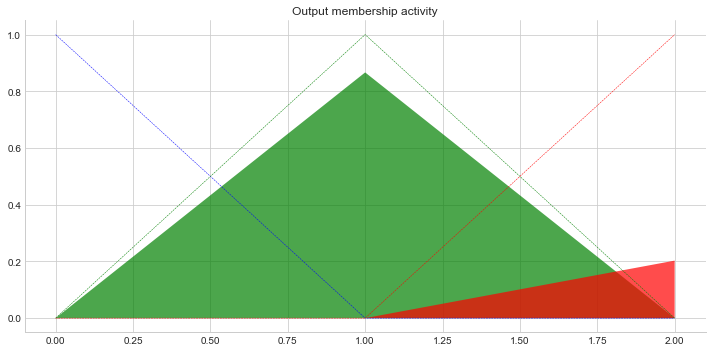

In [ ]:
# Rule 1
Y_activation_r1 = np.fmin(X1_level_pendek, Y_katA)
    
# Rule 2
rule2 = np.fmax(X1_level_sedang, X2_level_sedang)
Y_activation_r2 = np.fmin(rule2, Y_katB)
    
# Rule 3
rule3 = np.fmax(X1_level_panjang, X2_level_besar)
Y_activation_r3 = np.fmin(rule3, Y_katC)

# Zero array for visualization purpose
Y0 = np.zeros_like(Y_val)

# Visualize this
fig, ax0 = plt.subplots()

ax0.fill_between(Y_val, Y0, Y_activation_r1, facecolor='b', alpha=0.7)
ax0.plot(Y_val, Y_katA, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(Y_val, Y0, Y_activation_r2, facecolor='g', alpha=0.7)
ax0.plot(Y_val, Y_katB, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(Y_val, Y0, Y_activation_r3, facecolor='r', alpha=0.7)
ax0.plot(Y_val, Y_katC, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

Dapat dilihat bahwa untuk `PetalLengthCm` bernilai 4.21 dan `PetalWidthCm` bernilai 1.56, membership function untuk `Y_activation_r2` teraktivasi paling banyak, diikuti sedikit oleh `Y_activation_r3`. Sedangkan `Y_activation_r1` tidak teraktivasi.

# Rule Aggregation & Defuzzification

Setelah semua aktivitas output *membership functions* diketahui, semuanya harus digabungkan, biasanya menggunakan operator maksimum.

In [ ]:
# Aggregate all three output membership functions together
aggregated = np.fmax(Y_activation_r1, np.fmax(Y_activation_r2, Y_activation_r3))

Selanjutnya dilakukan *defuzzification*. Kita menggunakan metode *centroid* dari area.

Prediksi Kategori: 1.07


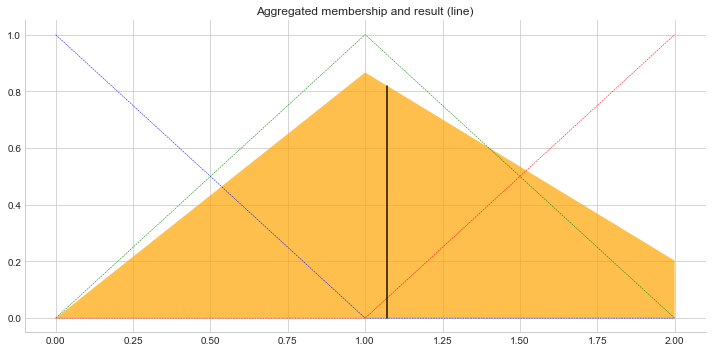

In [ ]:
# Calculate defuzzified result
Ypred = fuzz.defuzz(Y_val, aggregated, 'centroid')
Ypred_activation = fuzz.interp_membership(Y_val, aggregated, Ypred)  # for plot

# Visualize this
fig, ax0 = plt.subplots()

ax0.plot(Y_val, Y_katA, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(Y_val, Y_katB, 'g', linewidth=0.5, linestyle='--')
ax0.plot(Y_val, Y_katC, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(Y_val, Y0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([Ypred, Ypred], [0, Ypred_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
print('Prediksi Kategori: %.2f' % Ypred)

Dapat dilihat bahwa prediksi kategori bernilai 1.07. Karena ini dekat dengan 1, dapat disimpulkan bahwa jika bunga Iris mempunyai `PetalLengthCm` bernilai 4.21 dan `PetalWidthCm` bernilai 1.56, maka ia termasuk kategori B.

# Prediksi Dataset

Sekarang kita akan melakukan prediksi terhadap semua observasi dari dataset. Pertama, kita bentuk fungsi `predict()` yang berisikan langkah-langkah penerapan *rules*, *aggregation*, dan *defuzzification* seperti yang sudah dilakukan sebelumnya.

In [ ]:
def predict(x1, x2):
    # Perform interpolation of our fuzzy membership functions at these values
    X1_level_pendek  = fuzz.interp_membership(X1_val, X1_pendek, x1)
    X1_level_sedang  = fuzz.interp_membership(X1_val, X1_sedang, x1)
    X1_level_panjang = fuzz.interp_membership(X1_val, X1_panjang, x1)
    X2_level_kecil  = fuzz.interp_membership(X2_val, X2_kecil, x2)
    X2_level_sedang = fuzz.interp_membership(X2_val, X2_sedang, x2)
    X2_level_besar  = fuzz.interp_membership(X2_val, X2_besar, x2)

    # Rules
    Y_activation_r1 = np.fmin(X1_level_pendek, Y_katA)
    rule2 = np.fmax(X1_level_sedang, X2_level_sedang)
    Y_activation_r2 = np.fmin(rule2, Y_katB)
    rule3 = np.fmax(X1_level_panjang, X2_level_besar)
    Y_activation_r3 = np.fmin(rule3, Y_katC)

    # Rule aggregation & defuzzification
    aggregated = np.fmax(Y_activation_r1, np.fmax(Y_activation_r2, Y_activation_r3))
    Ypred = fuzz.defuzz(Y_val, aggregated, 'centroid')
    return Ypred

Fungsi `categorize()` berikut kemudian akan mengelompokkan hasil *defuzzification* ke dalam kategori tertentu dari spesies bunga Iris berdasarkan *threshold* berikut:

* `Ypred` $< 0.85$ masuk ke dalam kategori A
* $0.85 \leq$ `Ypred` $\leq 1.15$ masuk ke dalam kategori B
* `Ypred` $> 1.15$ masuk ke dalam kategori C

In [ ]:
def categorize(preds):
    preds_categorized = preds.copy()
    preds_categorized[preds < 0.85] = 0
    preds_categorized[preds > 1.15] = 2
    cond = np.logical_and(preds >= 0.85, preds <= 1.15)
    preds_categorized[cond] = 1
    return preds_categorized

Untuk melihat performa prediksi, kita menggunakan metric akurasi sebagai berikut.

In [ ]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).sum() / len(y_true)

In [ ]:
preds = []
for _, row in df[['PetalLengthCm', 'PetalWidthCm']].iterrows():
    x1 = row['PetalLengthCm']
    x2 = row['PetalWidthCm']
    preds.append(predict(x1, x2))
    
preds = categorize(np.array(preds))
print(f'Akurasi: %.2f' % accuracy(df['Species'], preds))

Akurasi: 0.97


Diperoleh akurasi yang sangat baik, sekitar 97%.

In [ ]:
################ Explor Defuzz method#############################

def predict(x1, x2):
    # Perform interpolation of our fuzzy membership functions at these values
    X1_level_pendek  = fuzz.interp_membership(X1_val, X1_pendek, x1)
    X1_level_sedang  = fuzz.interp_membership(X1_val, X1_sedang, x1)
    X1_level_panjang = fuzz.interp_membership(X1_val, X1_panjang, x1)
    X2_level_kecil  = fuzz.interp_membership(X2_val, X2_kecil, x2)
    X2_level_sedang = fuzz.interp_membership(X2_val, X2_sedang, x2)
    X2_level_besar  = fuzz.interp_membership(X2_val, X2_besar, x2)

    # Rules
    Y_activation_r1 = np.fmin(X1_level_pendek, Y_katA)
    rule2 = np.fmax(X1_level_sedang, X2_level_sedang)
    Y_activation_r2 = np.fmin(rule2, Y_katB)
    rule3 = np.fmax(X1_level_panjang, X2_level_besar)
    Y_activation_r3 = np.fmin(rule3, Y_katC)

    # Rule aggregation & defuzzification
    aggregated_trian = np.fmax(Y_activation_r1, np.fmax(Y_activation_r2, Y_activation_r3))
    
    defuzz_centroid = fuzz.defuzz(Y_val, aggregated_trian, 'centroid')  # Same as skfuzzy.centroid
    defuzz_bisector = fuzz.defuzz(Y_val, aggregated_trian, 'bisector')
    defuzz_mom = fuzz.defuzz(Y_val, aggregated_trian, 'mom')
    defuzz_som = fuzz.defuzz(Y_val, aggregated_trian, 'som')
    defuzz_lom = fuzz.defuzz(Y_val, aggregated_trian, 'lom')

    return defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom

In [ ]:
preds_centroid = []
preds_bisector = []
preds_mom = []
preds_som = []
preds_lom = []

for _, row in df[['PetalLengthCm', 'PetalWidthCm']].iterrows():
    x1 = row['PetalLengthCm']
    x2 = row['PetalWidthCm']
    cent, bisect, mom, som, lom = predict(x1, x2)
    preds_centroid.append(cent)
    preds_bisector.append(bisect)
    preds_mom.append(mom)
    preds_som.append(som)
    preds_lom.append(lom)

preds_centroid = categorize(np.array(preds_centroid))
preds_bisector = categorize(np.array(preds_bisector))
preds_mom = categorize(np.array(preds_mom))
preds_som = categorize(np.array(preds_som))
preds_lom = categorize(np.array(preds_lom))
#preds = categorize(np.array(preds))
print(f'Akurasi Centroid: %.2f' % accuracy(df['Species'], preds_centroid),
      f'\nAkurasi Bisector: %.2f' % accuracy(df['Species'], preds_bisector),
      f'\nAkurasi Mean of Maximum: %.2f' % accuracy(df['Species'], preds_mom),
      f'\nAkurasi Max of Maximum: %.2f' % accuracy(df['Species'], preds_som),
      f'\nAkurasi Min of Maximum: %.2f' % accuracy(df['Species'], preds_lom))

Akurasi Centroid: 0.97 
Akurasi Bisector: 0.97 
Akurasi Mean of Maximum: 0.84 
Akurasi Max of Maximum: 0.84 
Akurasi Min of Maximum: 0.84
